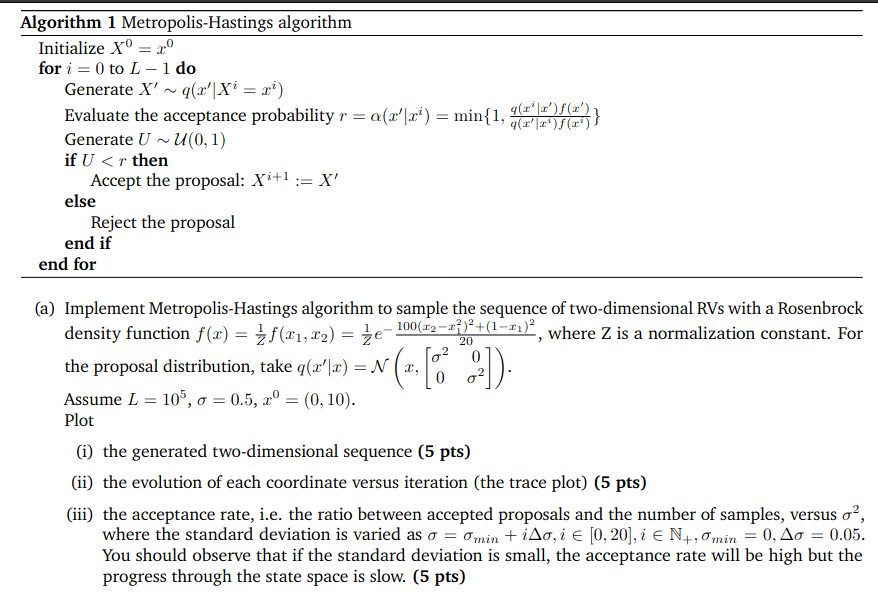

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [30]:
def sample_xl(x, Sigma):
    return np.random.multivariate_normal(x, Sigma)

In [31]:
def q(x, y, Sigma):
    n = len(x)
    Sigma_inv = np.linalg.inv(Sigma)
    delta = x - y
    norm_const = (2 * np.pi) ** (-n / 2) * np.linalg.det(Sigma) ** (-0.5)
    exponent = -0.5 * delta @ Sigma_inv @ delta
    return norm_const * np.exp(exponent)


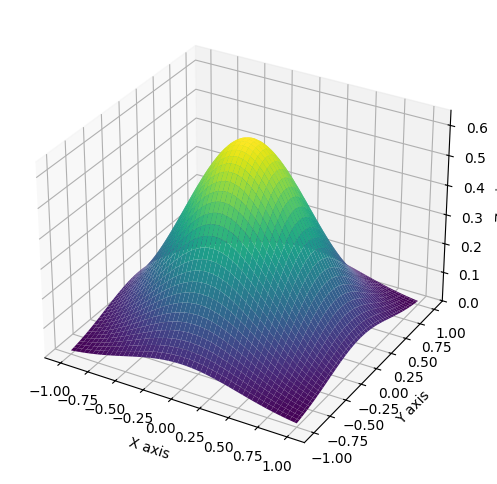

In [32]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

Sigma = [[0.25, 0], [0, 0.25]]

X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = q(point, [0, 0], Sigma)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()



As expected, the output of the function q is a 2D-Gaussian curve

In [33]:
def f(x):
    x1 = x[0]
    x2 = x[1]

    return np.exp(-((100) * ((x2 - x1*x1)*(x2 - x1*x1)) + (1 - x1)*(1 - x1))/20)

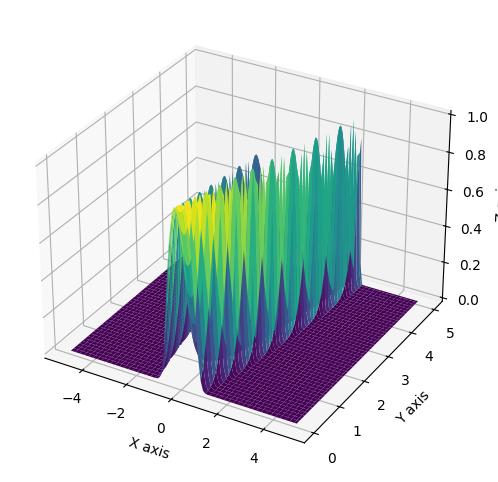

In [34]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-0, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = f(point)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()
        

In [35]:
def alpha(x, xl, Sigma):
    return min(1, (q(x, xl, Sigma) * f(xl))/(q(xl, x, Sigma) * f(x)))

In [36]:
def metropolis_hastings(L=10000, sigma=0.5):
    sigma_2 = sigma ** 2

    X = np.zeros(shape=(L+1, 2)) # Each line is a 2D Coordinate
    X[0] = [0, 10]

    Sigma = [[sigma_2, 0], [0, sigma_2]]

    num_of_acceptances = 0
    for i in range(L):
        xl = sample_xl(X[i], Sigma)
        # print(xl)

        r = alpha(X[i], xl, Sigma)
        u = np.random.uniform(0, 1)

        if (u < r):
            num_of_acceptances += 1
            X[i+1] = xl
        else:
            X[i+1] = X[i]

    acc_ratio = num_of_acceptances/L
    return X, acc_ratio

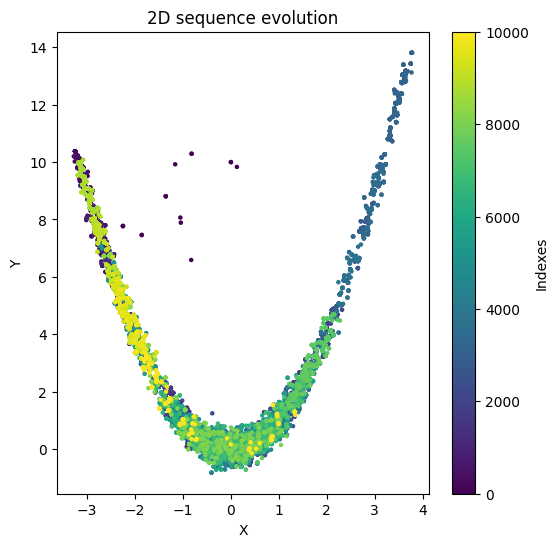

In [37]:
L=10000

X, acc = metropolis_hastings(L=L)

indexes = np.arange(L+1)
plt.figure(figsize=(6, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=indexes, cmap='viridis', s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D sequence evolution')

# Adicionar barra de cor para mostrar correspondência índice ↔ cor
plt.colorbar(scatter, label='Indexes')


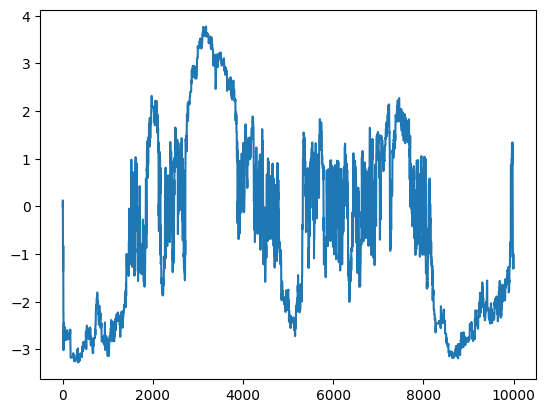

In [38]:
plt.plot(X[:, 0])

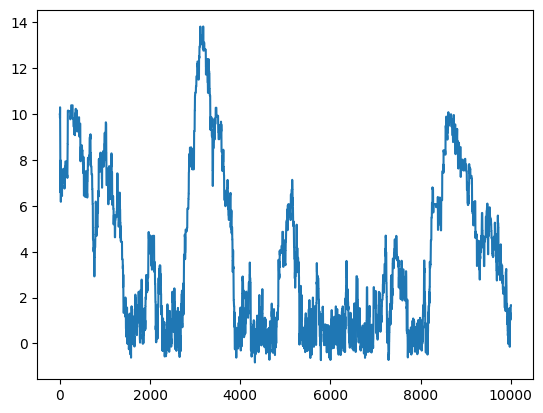

In [39]:
plt.plot(X[:, 1])

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
sigma: 0.05, acc: 0.7402
sigma: 0.1, acc: 0.5324
sigma: 0.15, acc: 0.63
sigma: 0.2, acc: 0.4314
sigma: 0.25, acc: 0.5504
sigma: 0.3, acc: 0.3434
sigma: 0.35, acc: 0.1614
sigma: 0.39999999999999997, acc: 0.205
sigma: 0.44999999999999996, acc: 0.3198
sigma: 0.49999999999999994, acc: 0.192
sigma: 0.5499999999999999, acc: 0.2292
sigma: 0.6, acc: 0.0792
sigma: 0.65, acc: 0.2942
sigma: 0.7, acc: 0.234
sigma: 0.75, acc: 0.2328
sigma: 0.7999999999999999, acc: 0.1044
sigma: 0.85, acc: 0.1612
sigma: 0.9, acc: 0.1872
sigma: 0.95, acc: 0.146
sigma: 1.0, acc: 0.1952


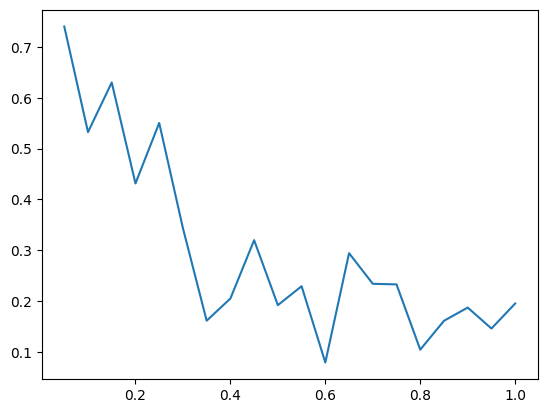

In [40]:
sigmas = np.linspace(0.05, 1, 20)
print(sigmas)

acc_ratios = []

for sigma in sigmas:
    X, acc = metropolis_hastings(L=5000, sigma=sigma)
    acc_ratios.append(acc)

    print(f"sigma: {sigma}, acc: {acc}")

plt.plot(sigmas, acc_ratios)

# 1 B

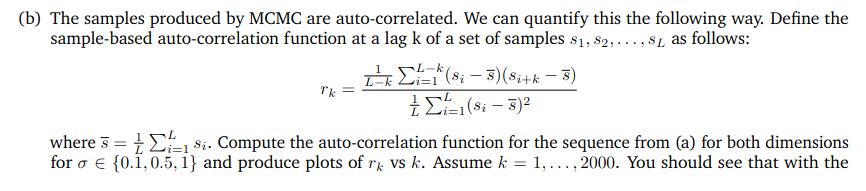

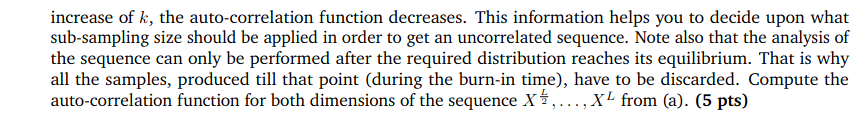

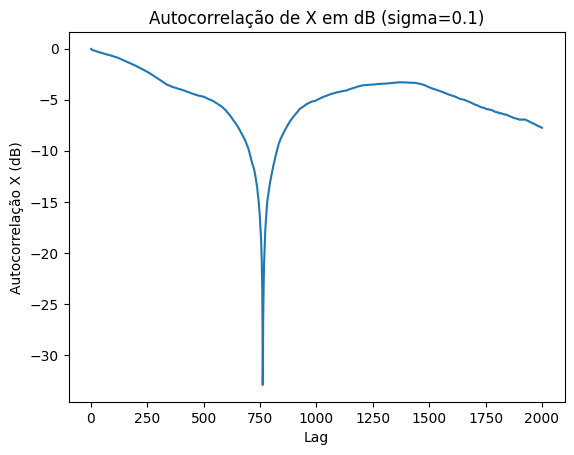

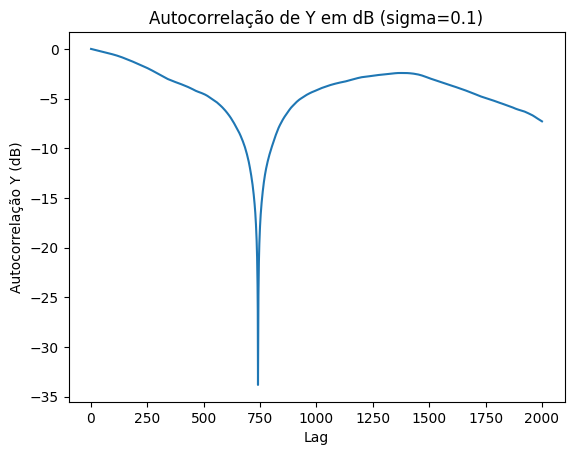

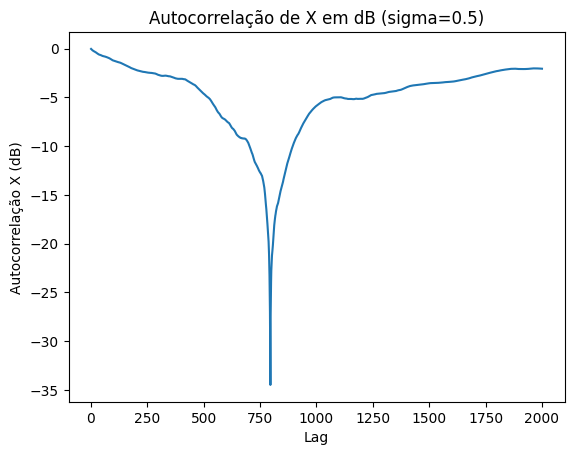

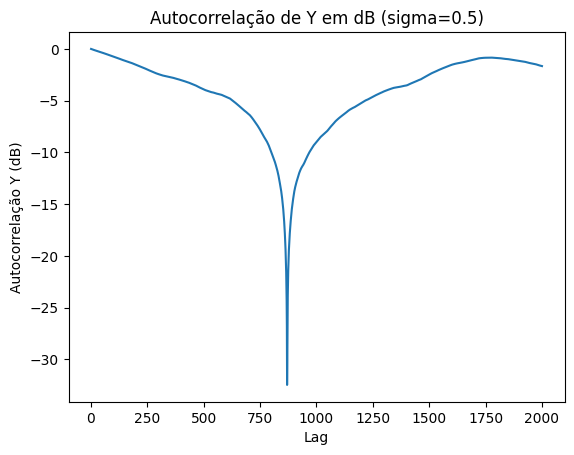

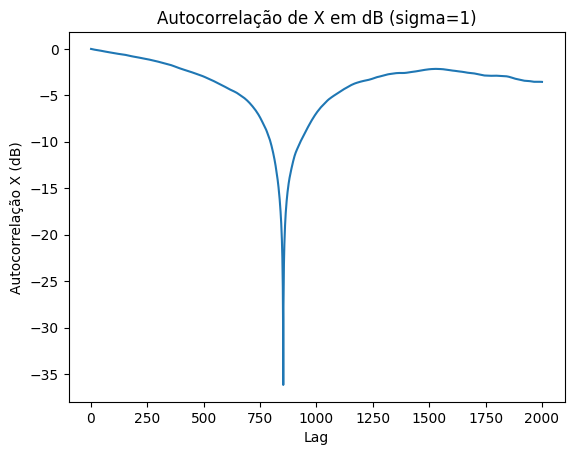

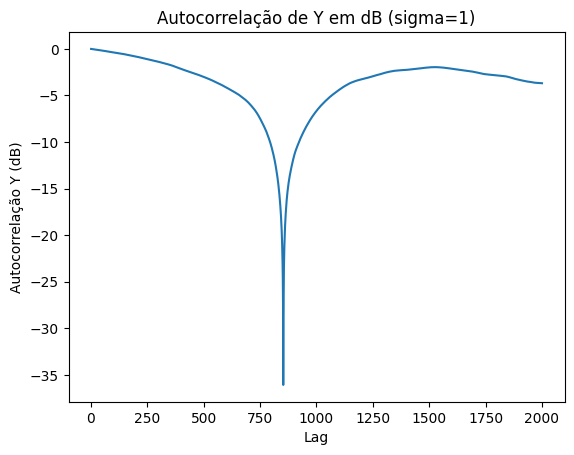

In [43]:
def rk(s, k):
    mean_s = np.mean(s)
    normalized_s = s - mean_s
    L = len(s)
    denominator = np.mean(normalized_s ** 2)

    numerator = np.mean((normalized_s[:L - k]) * (normalized_s[k:]))
    return numerator / denominator

sigmas = [0.1, 0.5, 1]
desired_lags = np.arange(1,2000 + 1)

x_corr = np.zeros_like(desired_lags)
y_corr = np.zeros_like(desired_lags)

L = 10000
for sigma in sigmas:
    X = metropolis_hastings(L=L, sigma=sigma)
    X = X[0] if isinstance(X, tuple) else X
    X = X[int(L/2):, :]  # cut first L/2 lines

    x = X[:, 0]
    y = X[:, 1]

    x_corr = [rk(x, k) for k in desired_lags]
    y_corr = [rk(y, k) for k in desired_lags]
    # Converter para decibel (dB)
    x_corr_db = 10 * np.log10(np.abs(x_corr))
    y_corr_db = 10 * np.log10(np.abs(y_corr))

    plt.plot(desired_lags, x_corr_db)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelação X (dB)')
    plt.title(f'Autocorrelação de X em dB (sigma={sigma})')
    plt.show()

    plt.plot(desired_lags, y_corr_db)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelação Y (dB)')
    plt.title(f'Autocorrelação de Y em dB (sigma={sigma})')
    plt.show()